In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

API_KEY = "d4c7eac436a48e5765de3036b2eeb147"   
CITY = "Chennai"
UNITS = "metric"  # 'metric' = °C


In [22]:
url = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units={UNITS}"
resp = requests.get(url, timeout=10)
data = resp.json()

if resp.status_code != 200:
    print("Error fetching API:", data)
else:
    print("Data fetched successfully. Forecast points:", len(data.get("list", [])))


Data fetched successfully. Forecast points: 40


In [23]:
if resp.status_code == 200 and "list" in data:
    rows = []
    for item in data["list"]:
        rows.append({
            "dt": item.get("dt_txt"),
            "temp": item["main"].get("temp"),
            "feels_like": item["main"].get("feels_like"),
            "humidity": item["main"].get("humidity"),
            "wind_speed": item.get("wind", {}).get("speed"),
            "clouds": item.get("clouds", {}).get("all"),
            "description": item.get("weather", [{}])[0].get("description")
        })
    df = pd.DataFrame(rows)
    df["dt"] = pd.to_datetime(df["dt"])
    df = df.set_index("dt").sort_index()
    display(df.head())
else:
    df = pd.DataFrame()
    print("No forecast data to parse.")


,temp,feels_like,humidity,wind_speed,clouds,description
dt,,,,,,
2025-08-19 15:00:00,30.69,34.67,62,0.91,98,light rain
2025-08-19 18:00:00,29.13,31.58,62,5.55,99,overcast clouds
2025-08-19 21:00:00,27.05,28.22,61,6.21,100,overcast clouds
2025-08-20 00:00:00,26.45,26.45,63,5.71,99,overcast clouds
2025-08-20 03:00:00,29.25,30.54,54,6.75,66,broken clouds


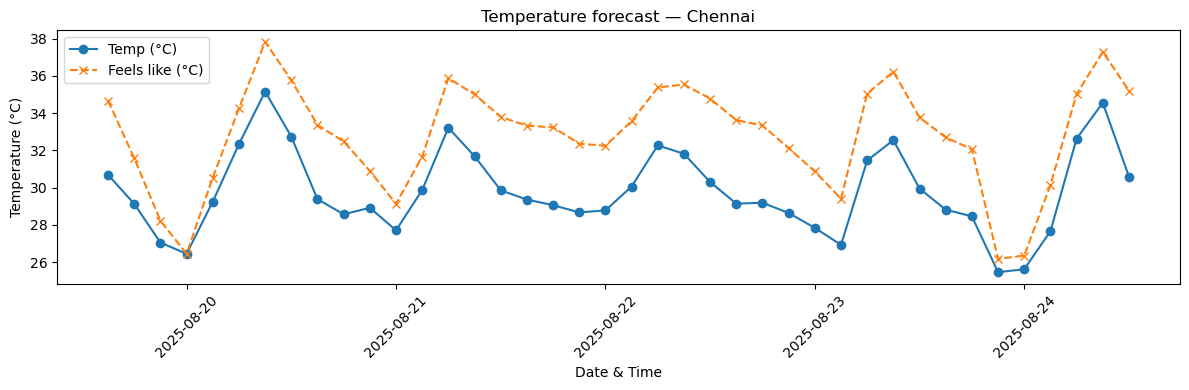

In [24]:
if not df.empty:
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df["temp"], marker="o", label="Temp (°C)")
    plt.plot(df.index, df["feels_like"], marker="x", linestyle="--", label="Feels like (°C)")
    plt.title(f"Temperature forecast — {CITY}")
    plt.xlabel("Date & Time")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Dataframe empty — cannot plot.")


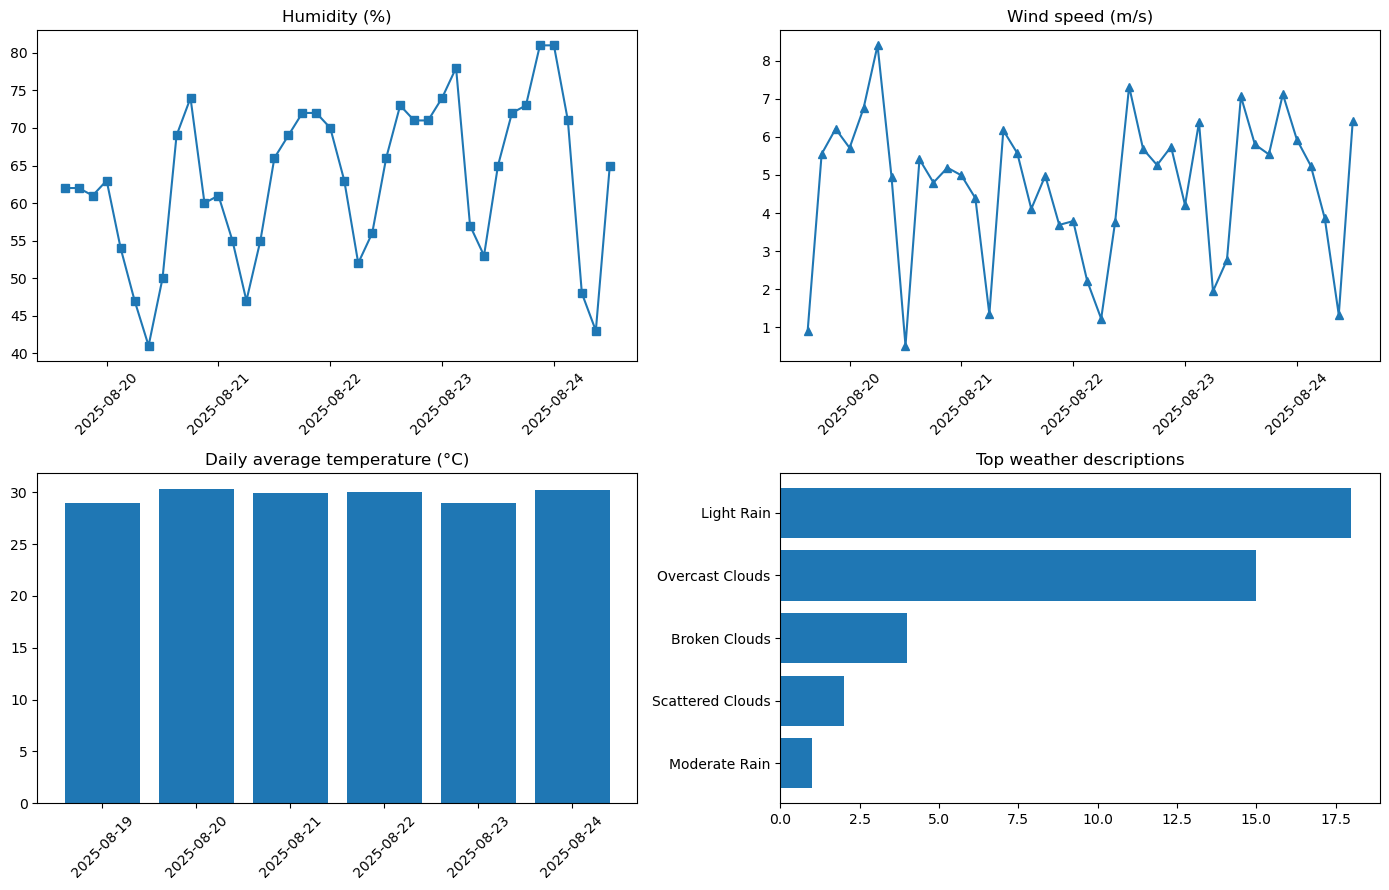

In [25]:
if not df.empty:
    plt.figure(figsize=(14,9))

    # Humidity
    plt.subplot(2,2,1)
    plt.plot(df.index, df["humidity"], marker="s")
    plt.title("Humidity (%)")
    plt.xticks(rotation=45)

    # Wind speed
    plt.subplot(2,2,2)
    plt.plot(df.index, df["wind_speed"], marker="^")
    plt.title("Wind speed (m/s)")
    plt.xticks(rotation=45)

    # Daily average temperature
    plt.subplot(2,2,3)
    daily_temp = df["temp"].resample("D").mean()
    plt.bar(daily_temp.index.strftime("%Y-%m-%d"), daily_temp.values)
    plt.title("Daily average temperature (°C)")
    plt.xticks(rotation=45)

    # Top weather descriptions
    plt.subplot(2,2,4)
    desc_counts = df["description"].str.title().value_counts().head(6)
    plt.barh(desc_counts.index[::-1], desc_counts.values[::-1])
    plt.title("Top weather descriptions")
    plt.tight_layout()
    plt.show()
else:
    print("Dataframe empty — cannot plot dashboard.")


In [26]:
if not df.empty:
    hottest_time = df["temp"].idxmax()
    hottest_value = df["temp"].max()
    most_humid_time = df["humidity"].idxmax()
    most_humid_value = df["humidity"].max()
    avg_temp = df["temp"].mean().round(2)

    print(f"Hottest forecasted time: {hottest_time} -> {hottest_value} °C")
    print(f"Most humid forecasted time: {most_humid_time} -> {most_humid_value} %")
    print(f"Average temperature (period): {avg_temp} °C")
else:
    print("No data for insights.")


Hottest forecasted time: 2025-08-20 09:00:00 -> 35.16 °C
Most humid forecasted time: 2025-08-23 21:00:00 -> 81 %
Average temperature (period): 29.8 °C


In [27]:
if not df.empty:
    alerts = []
    if df["wind_speed"].max() > 10:
        alerts.append("High wind expected ( > 10 m/s ).")
    if df["humidity"].max() > 85:
        alerts.append("Very high humidity expected ( > 85% ).")
    if df["description"].str.contains("rain|drizzle|thunder", case=False).any():
        alerts.append("Rain or thunder expected in the forecast.")

    if alerts:
        print("ALERTS:")
        for a in alerts:
            print("-", a)
    else:
        print("No alerts detected.")
else:
    print("No data for alerts.")


ALERTS:
- Rain or thunder expected in the forecast.


In [28]:
if not df.empty:
    out_name = f"weather_forecast_{CITY.replace(' ', '_')}.csv"
    df.to_csv(out_name)
    print("Saved CSV:", out_name)
else:
    print("No data to save.")


Saved CSV: weather_forecast_Chennai.csv
